In [144]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
import datetime
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 32})
sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 2})  
plt.rcParams['figure.figsize'] = 15, 12

pd.options.display.max_columns = 999
pd.options.display.max_rows = 100


from datetime import datetime
str(datetime.now())



'2017-08-15 14:52:15.261928'

In [145]:
df = data.read_data('Vansjo/VAN1_data_2017_02_28_10_55.xlsx')

/Users/MarkelovIgor/git/biogeochemistry/MyLake_v2_Vansjo/Postproc_code/data.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)


In [146]:
plotter = ResultsPlotter(f='../IO/MyLakeResults.mat')

### Phosphorus

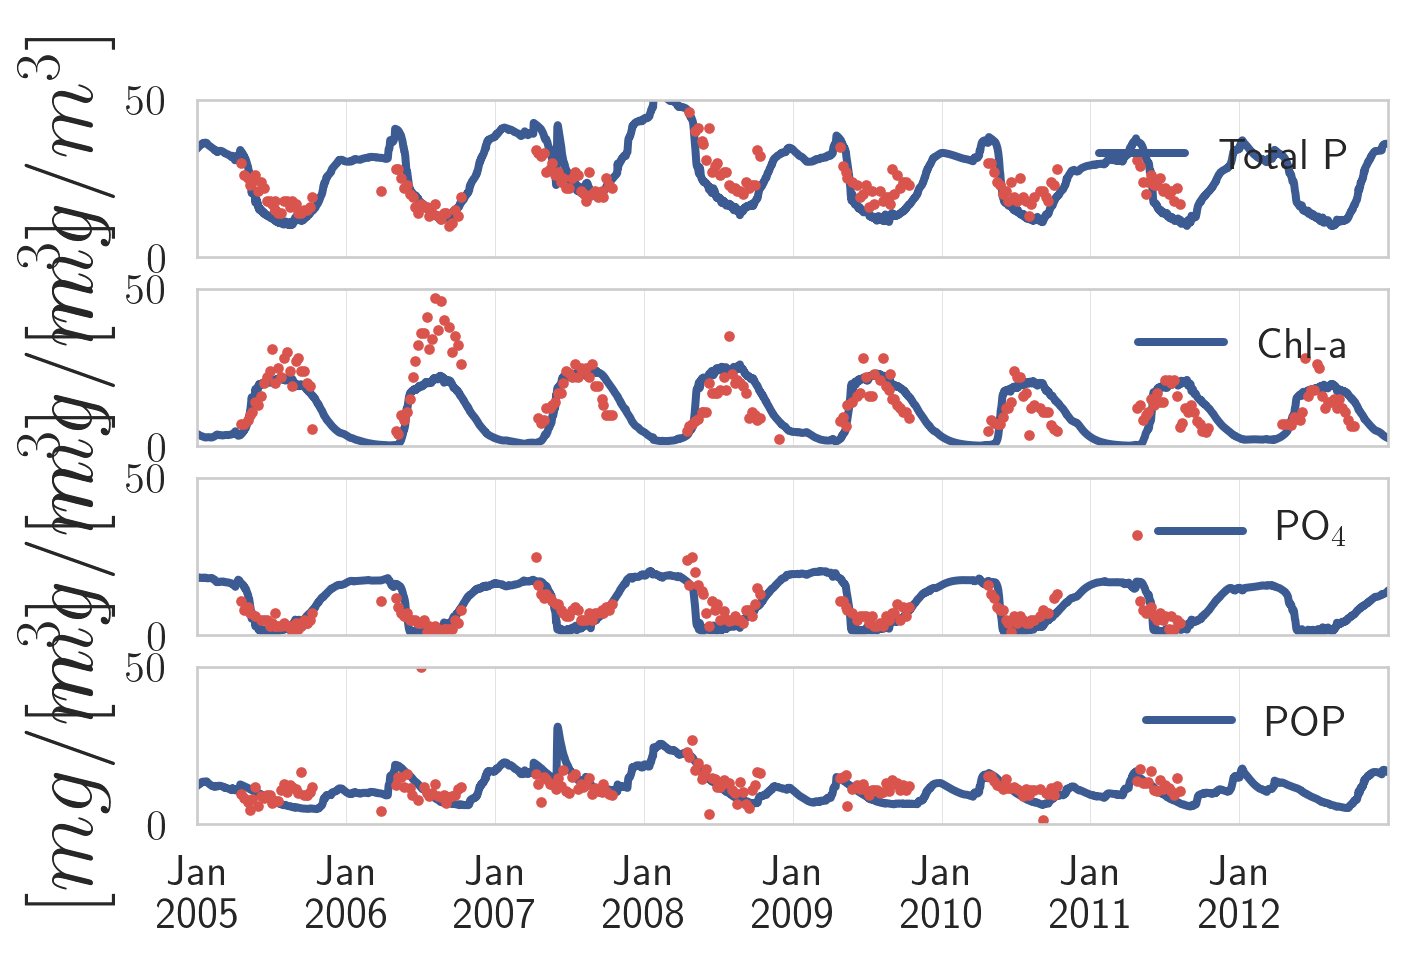

In [147]:
plotter.phosphorus_fit()

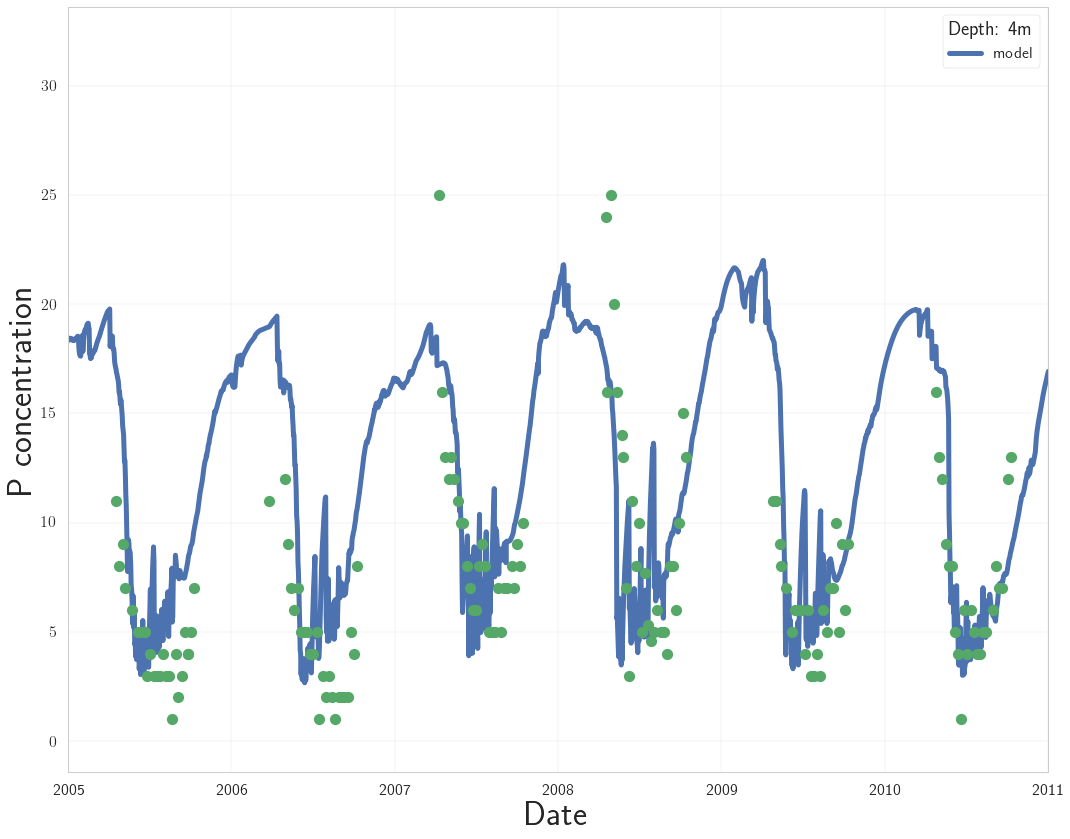

In [148]:
ax = plotter.plot_fit_wc(['P'], depth=4, dstart='2005-01-01', dend='2011-01-01', factor=1)
data.plot_depth(df, 'PO4-P', depth=0, ax=ax)

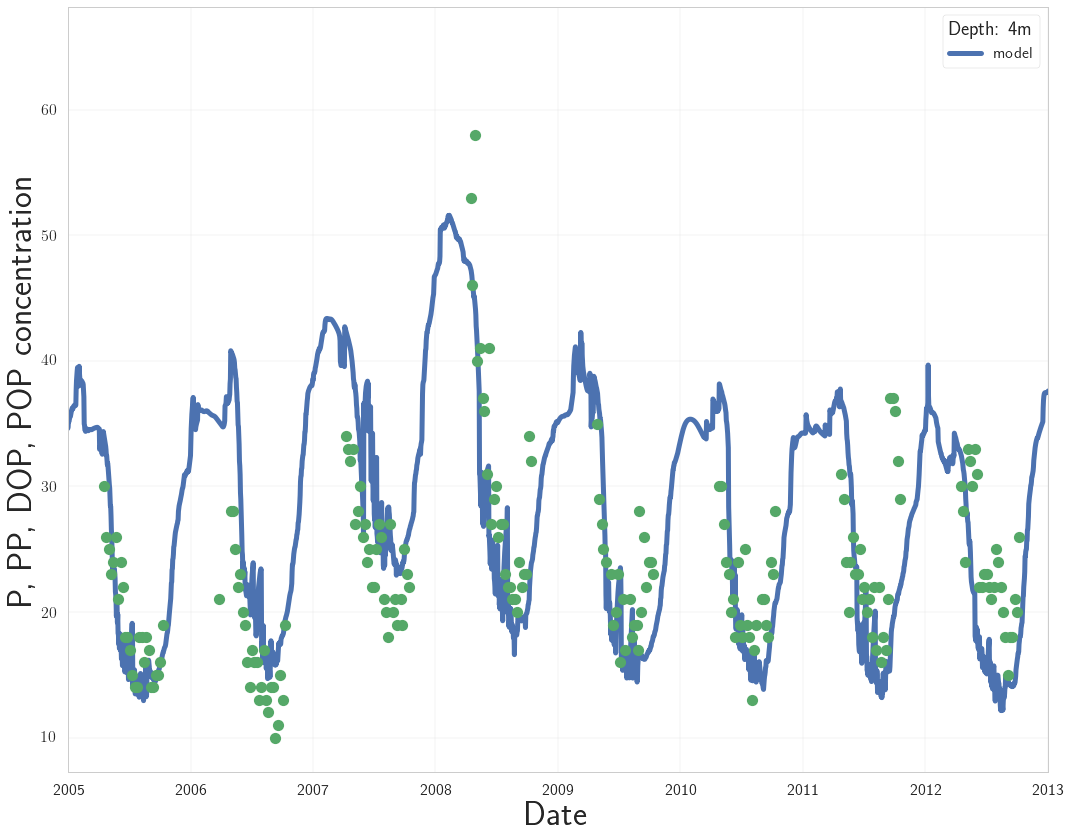

In [149]:
ax = plotter.plot_fit_wc(['P', 'PP', 'DOP', 'POP'], depth=4, dstart='2005-01-01', dend='2013-01-01', factor=1)
data.plot_depth(df, 'TOTP', depth=0, ax=ax)

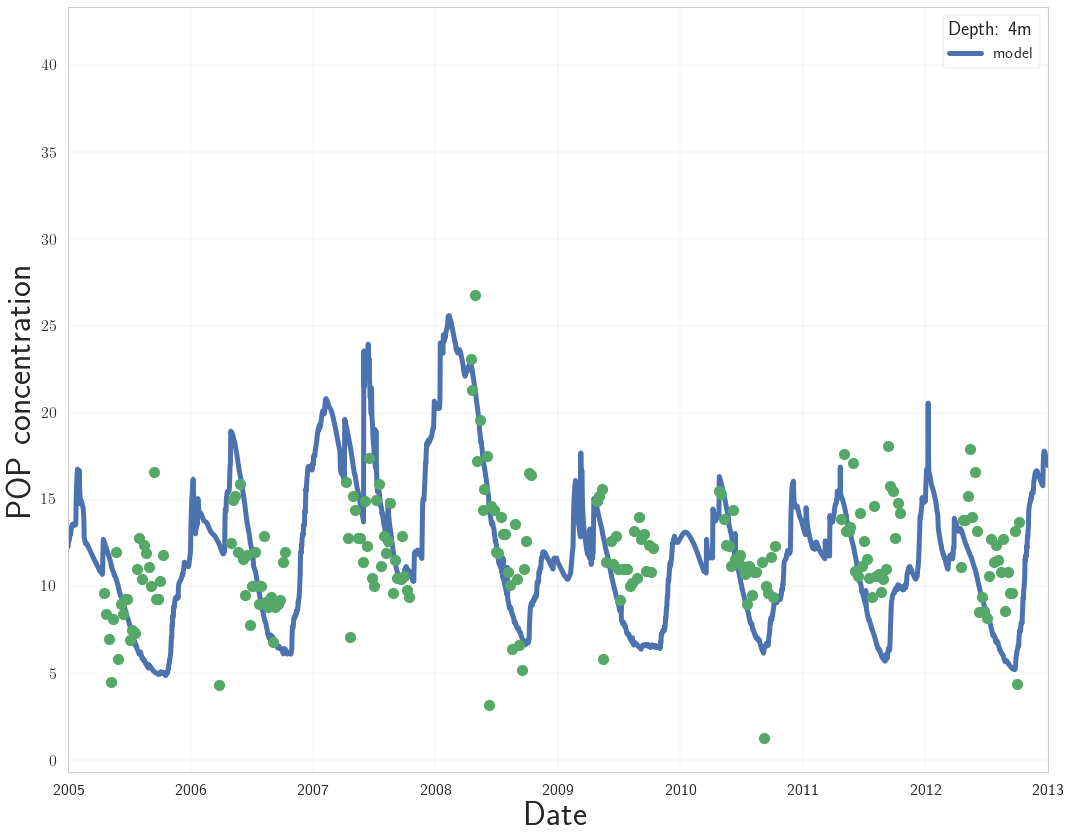

In [150]:
ax = plotter.plot_fit_wc(['POP'], depth=4, dstart='2005-01-01', dend='2013-01-01', factor=1)
data.plot_depth(df, 'POP', depth=0, ax=ax)

### Oxygen

In [151]:
value = 'O2'
d = 'Depth2'
df[df.Depth1 == df.Depth1][[d, value]].groupby(d).count()

,O2
Depth2,
0,193
1,0
2,2
3,1
4,3
5,195
6,0
7,2
8,3


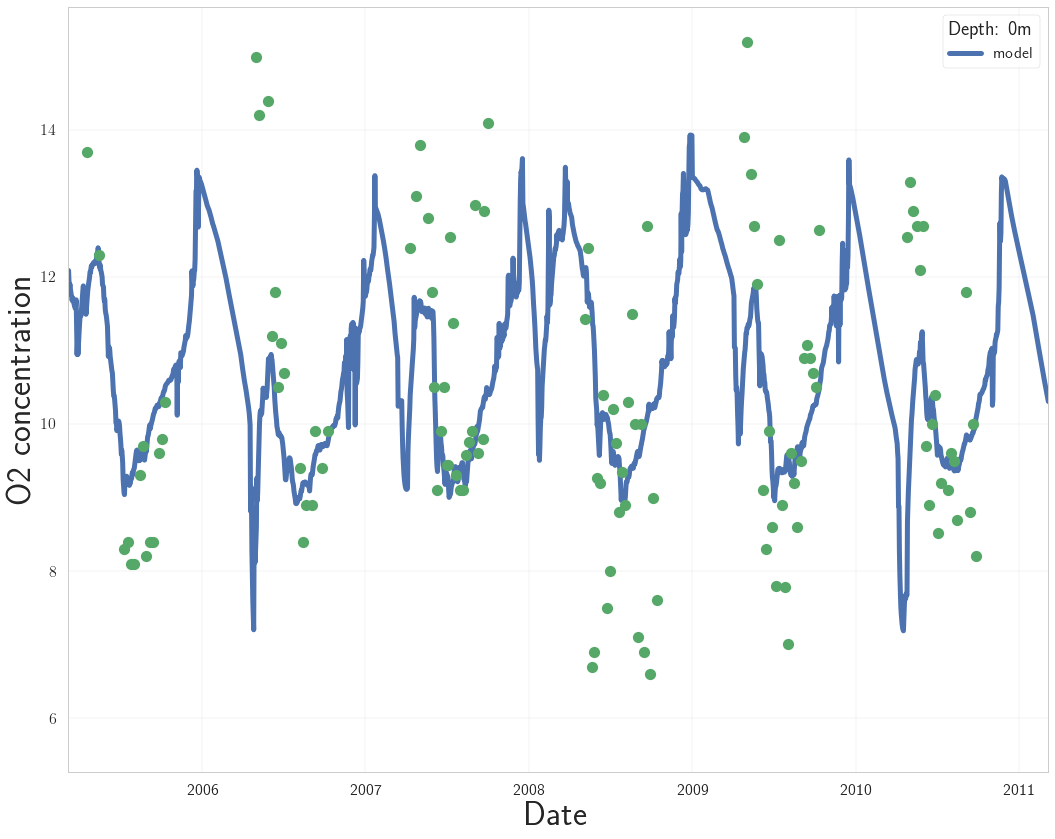

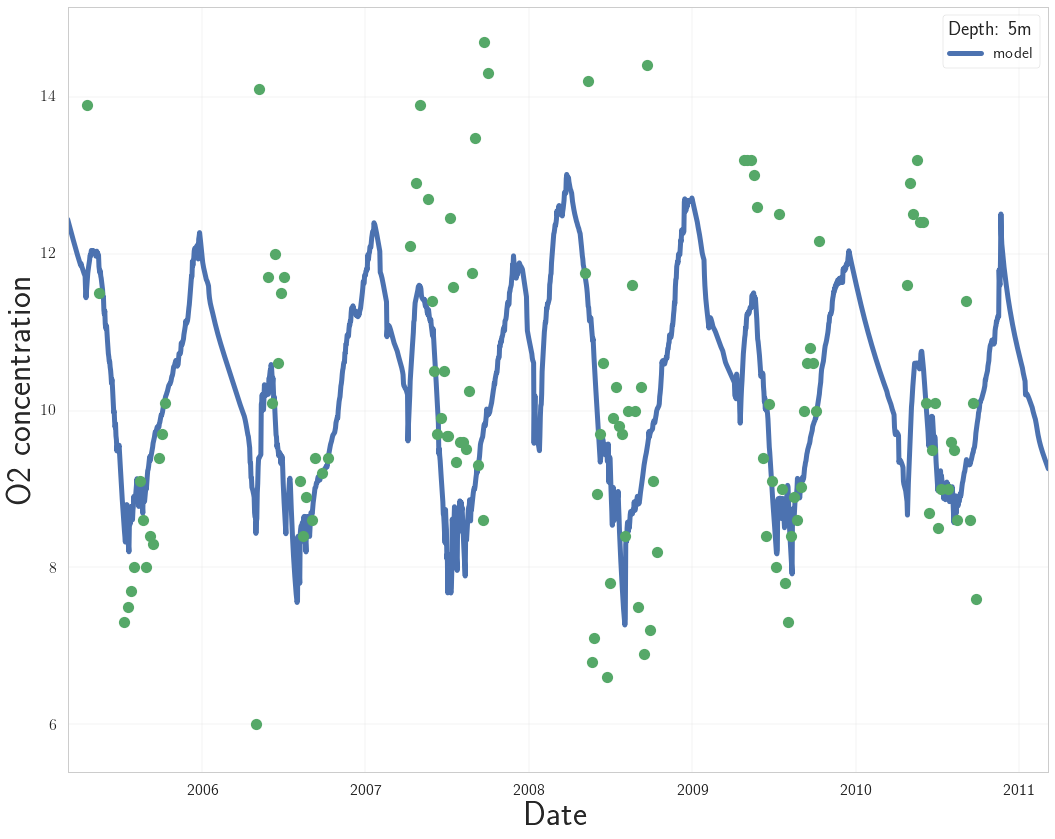

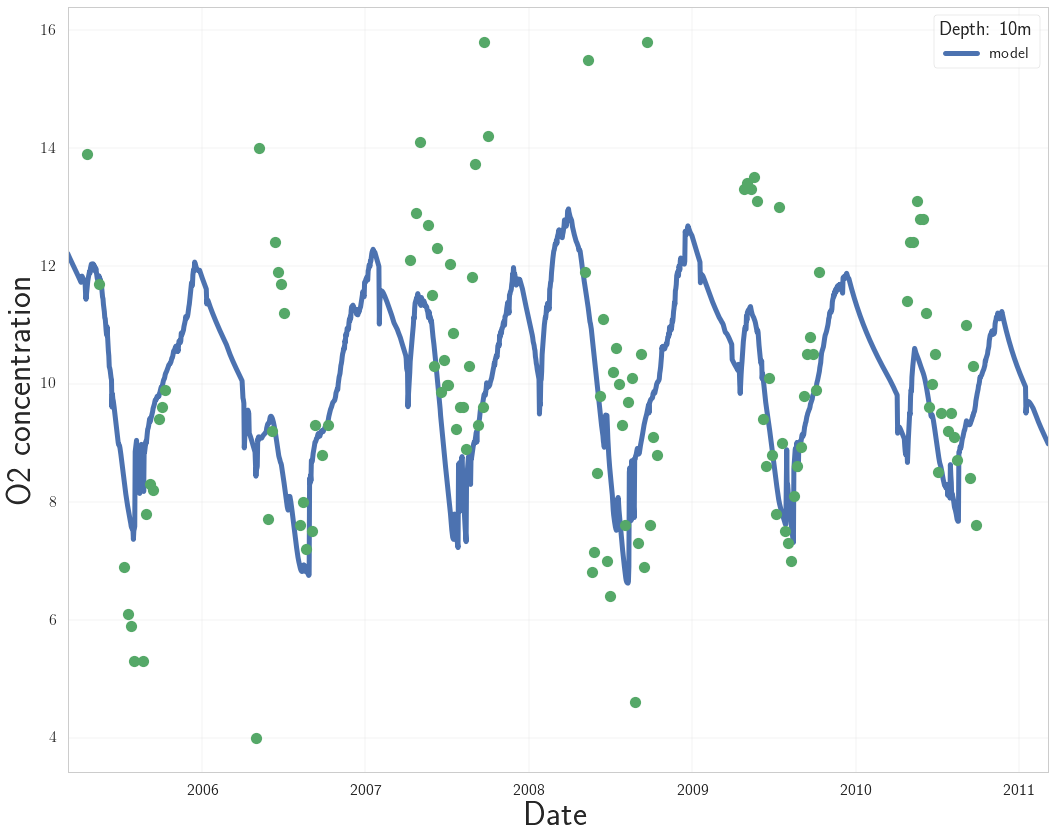

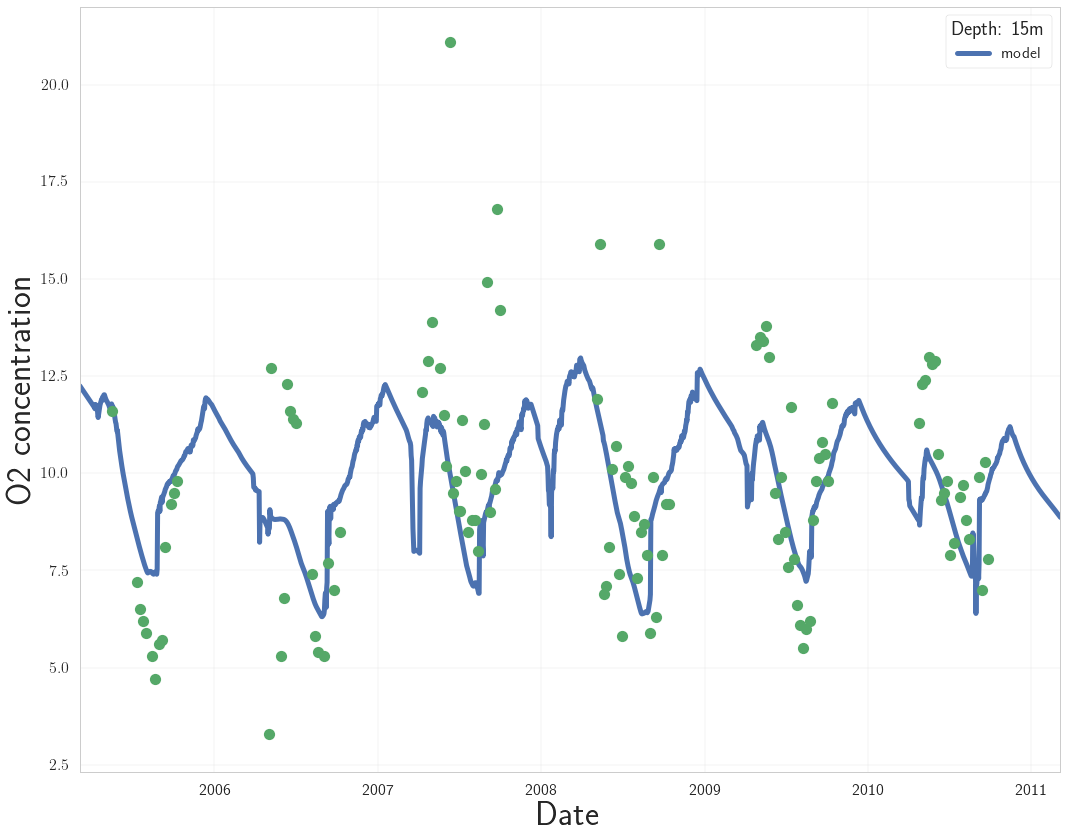

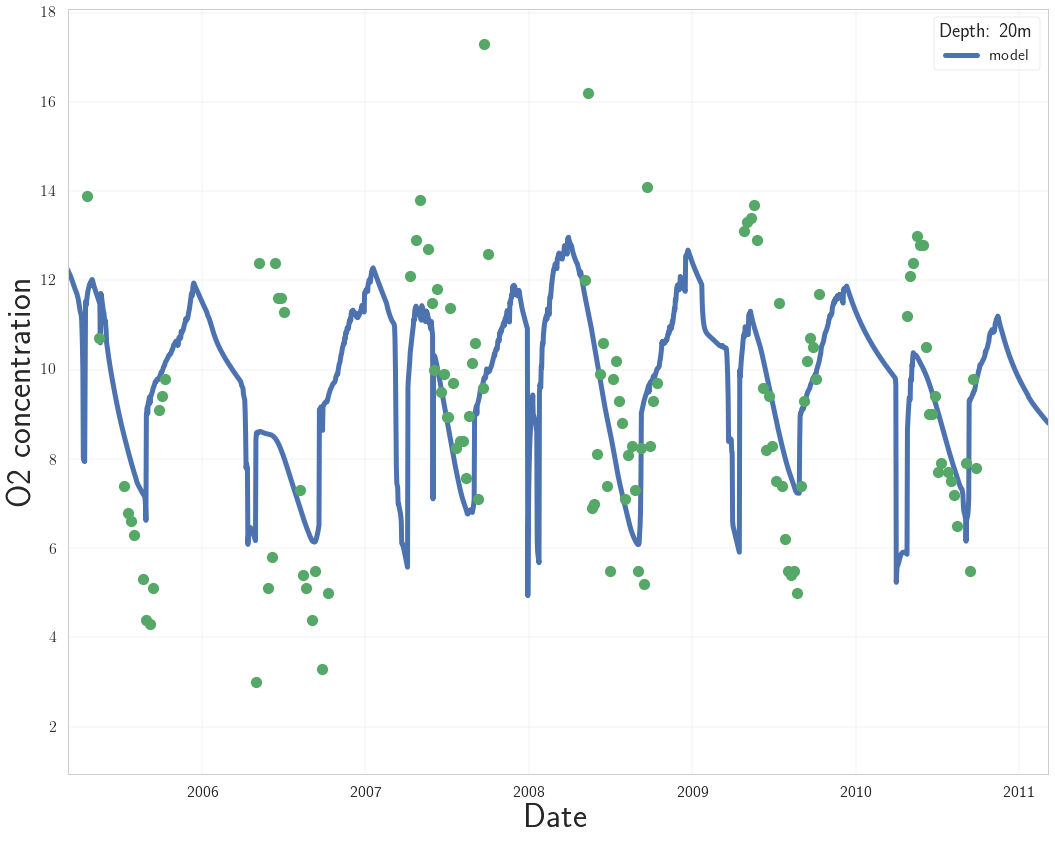

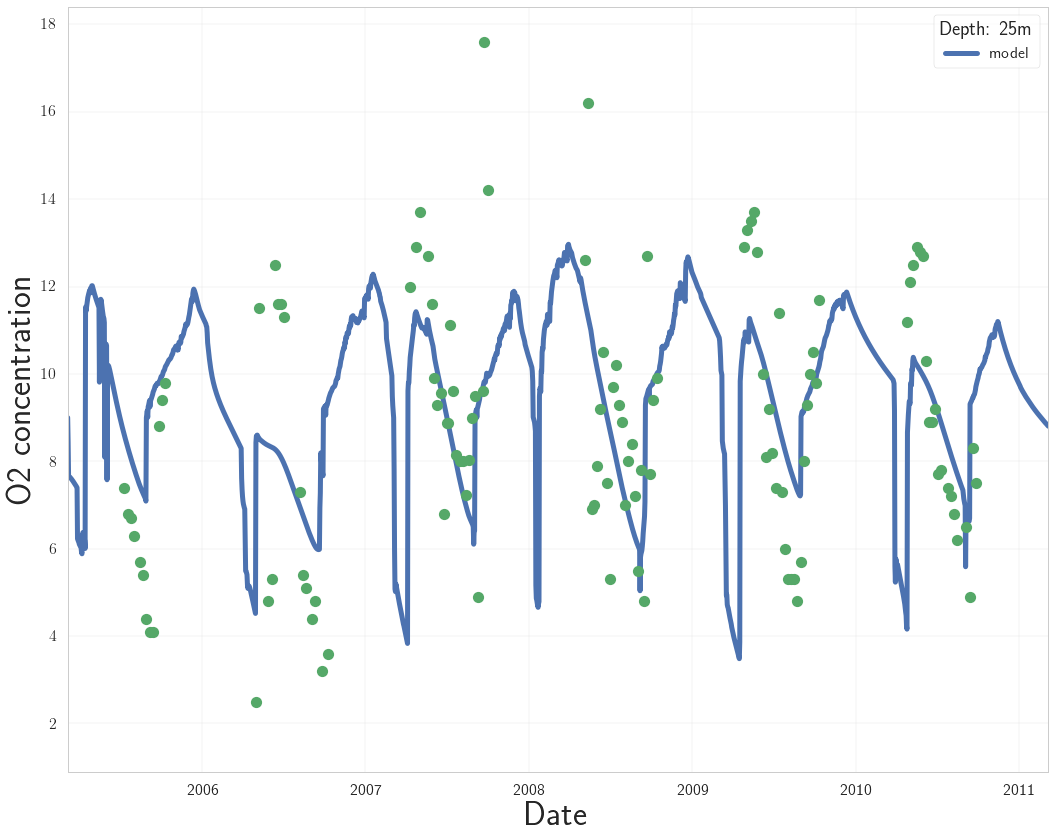

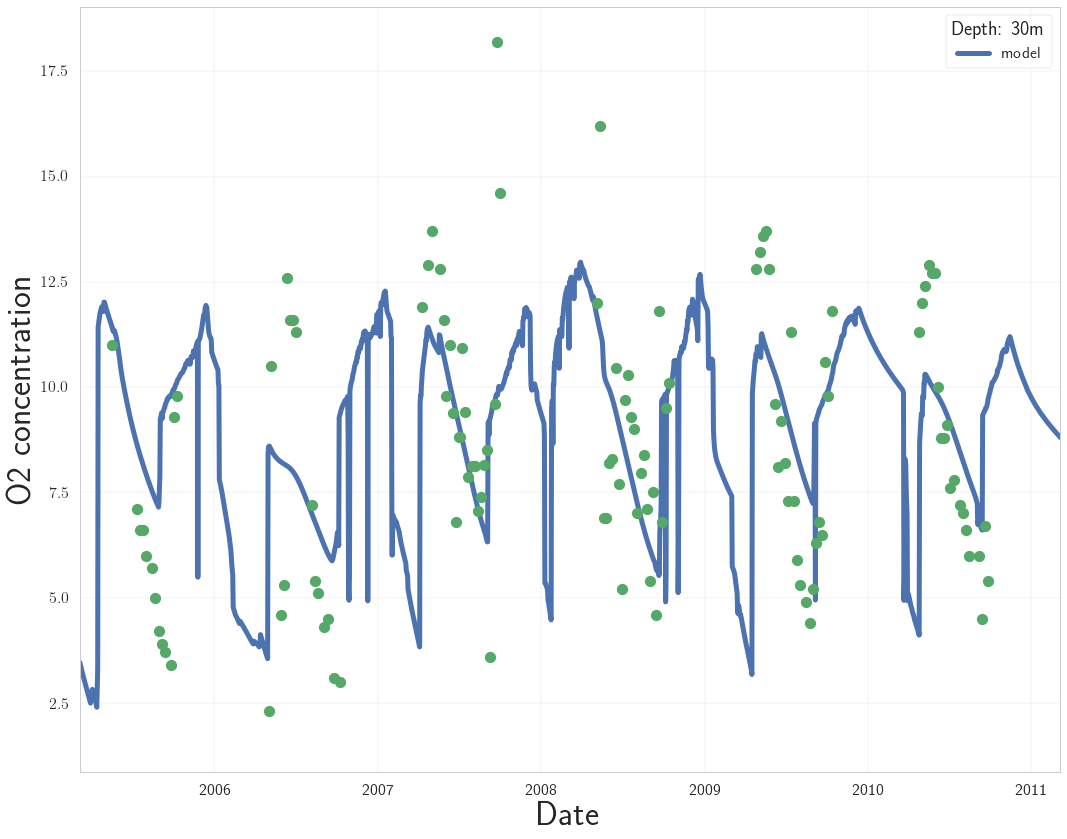

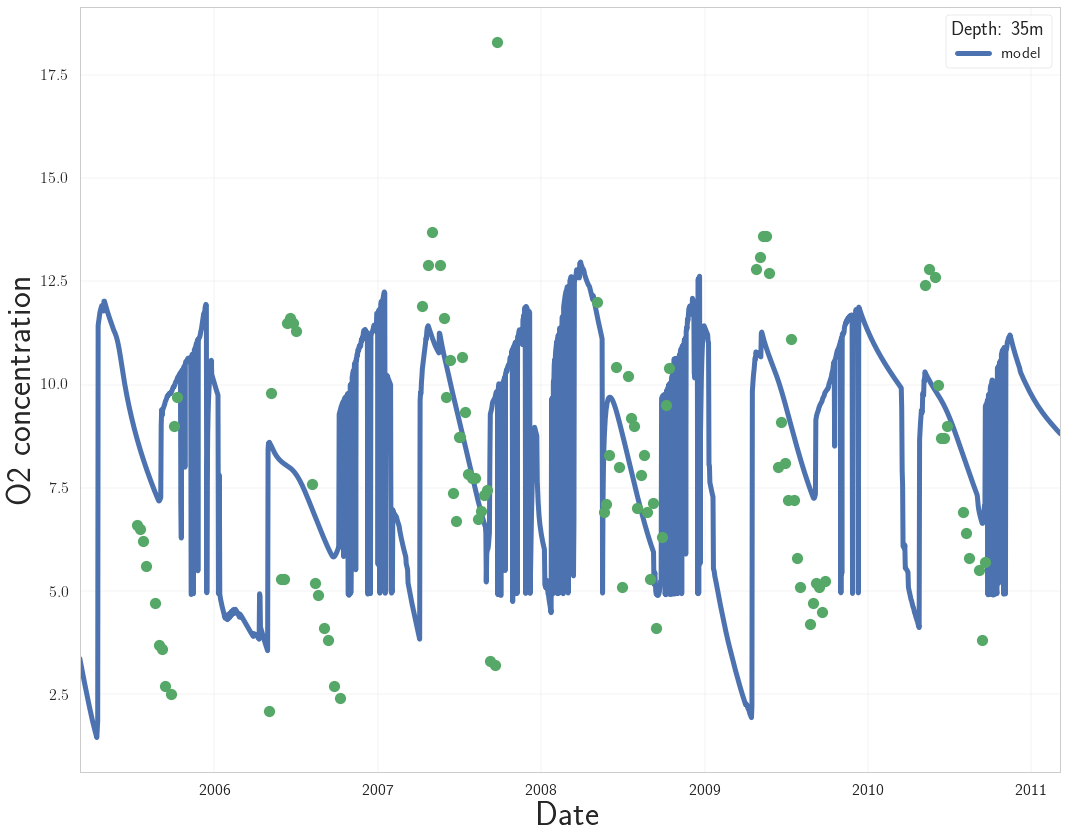

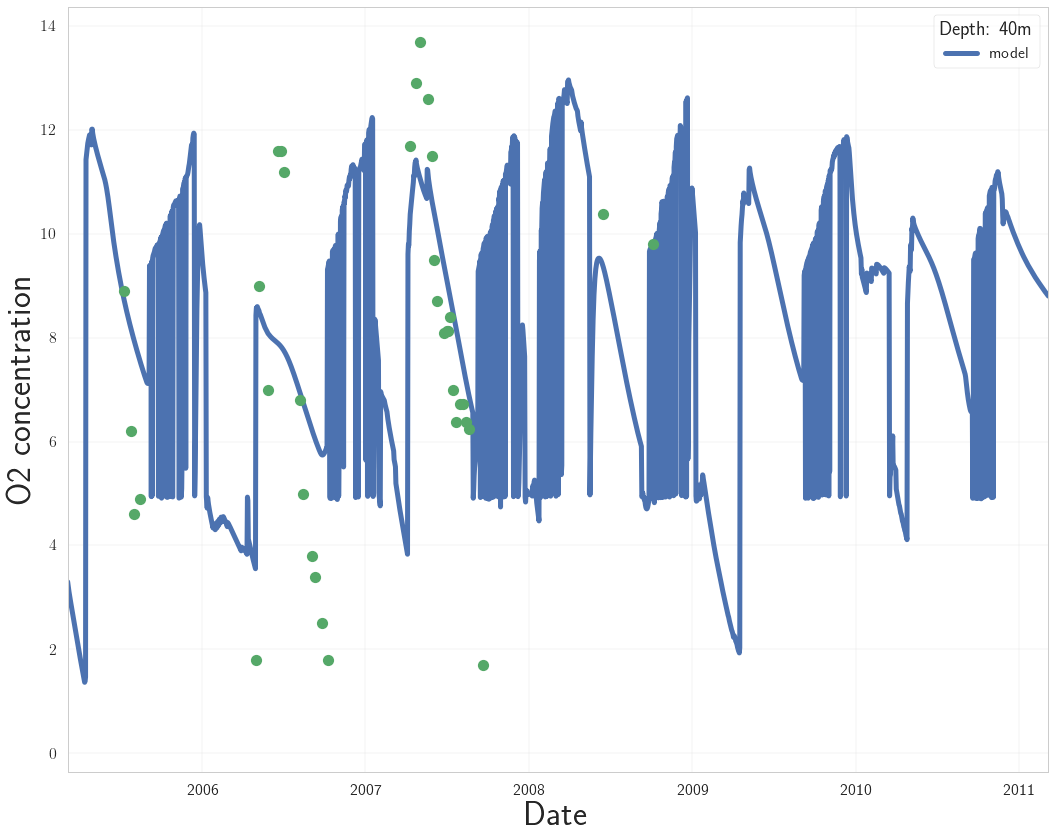

In [152]:
for d in [0,5,10,15,20,25, 30, 35, 40]:
    f, ax = plt.subplots()
    ax = plotter.oxygen_fit_wc(depth=d, ax=ax)
    ax = data.plot_depth(df[df.Depth1 == df.Depth1], 'O2', depth=d, ax=ax)

### NItrate

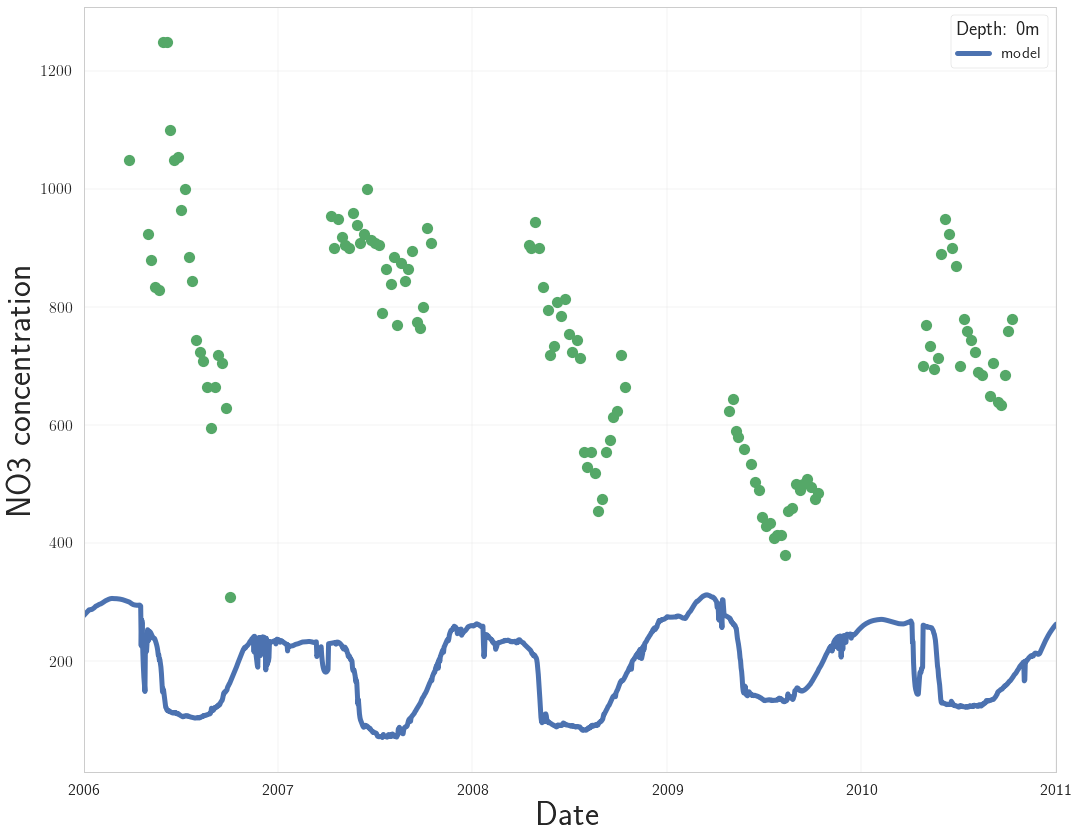

In [153]:
ax = plotter.plot_fit_wc(['NO3'], depth=0, dstart='2006-01-01', dend='2011-01-01', factor=14/62)
data.plot_depth(df, 'NO3-N', depth=0, ax=ax)

### Temperature

In [154]:
value = 'Temperatur'
df[['Depth1', value]].groupby('Depth1').count()

,Temperatur
Depth1,
0,224
1,0
2,1
3,5
4,0
5,218
6,4
7,1
8,3


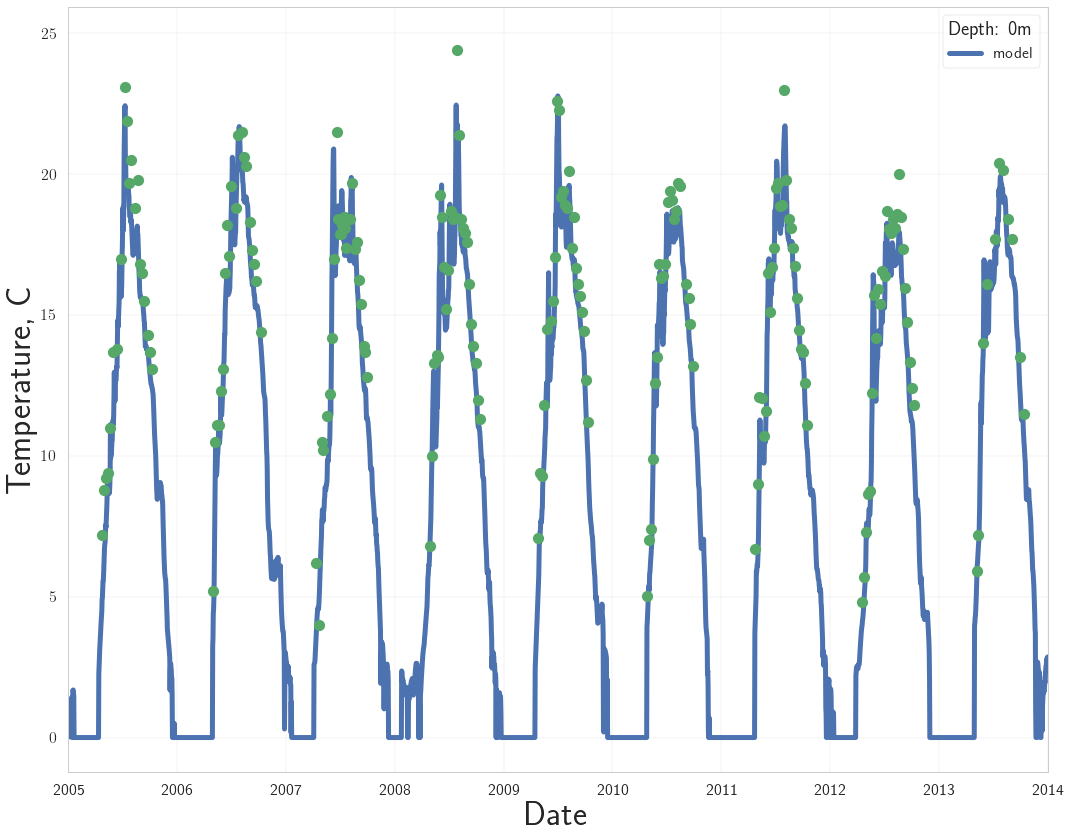

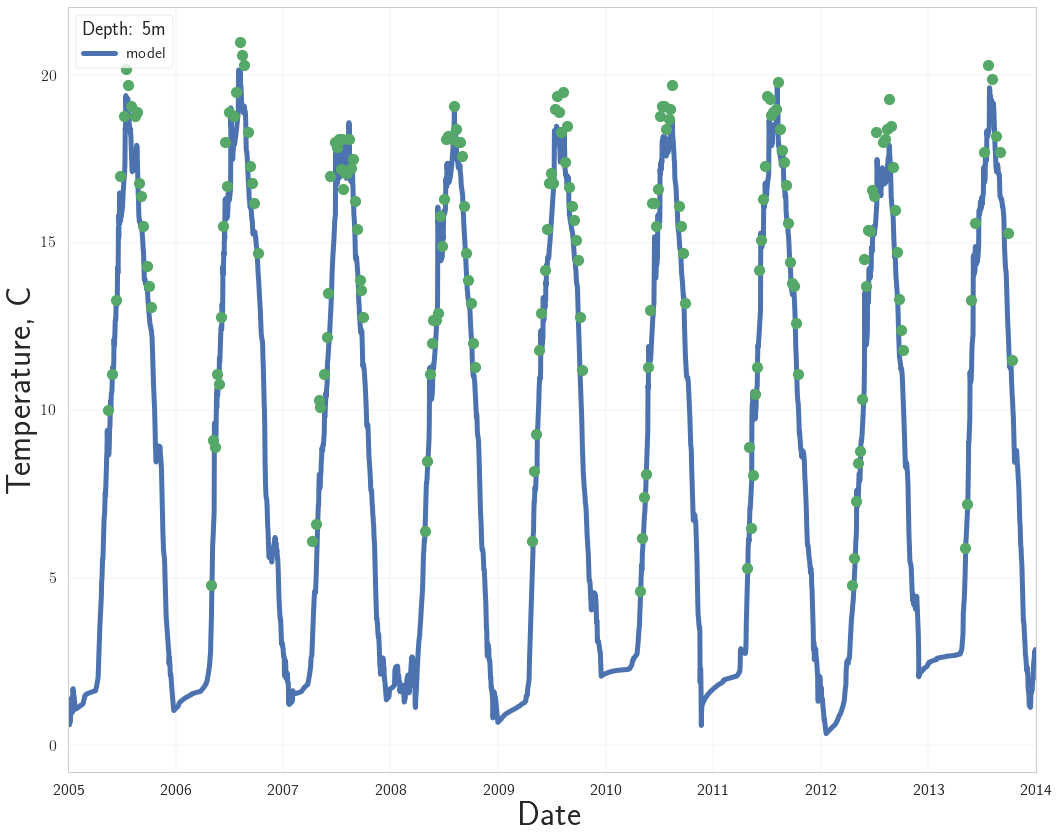

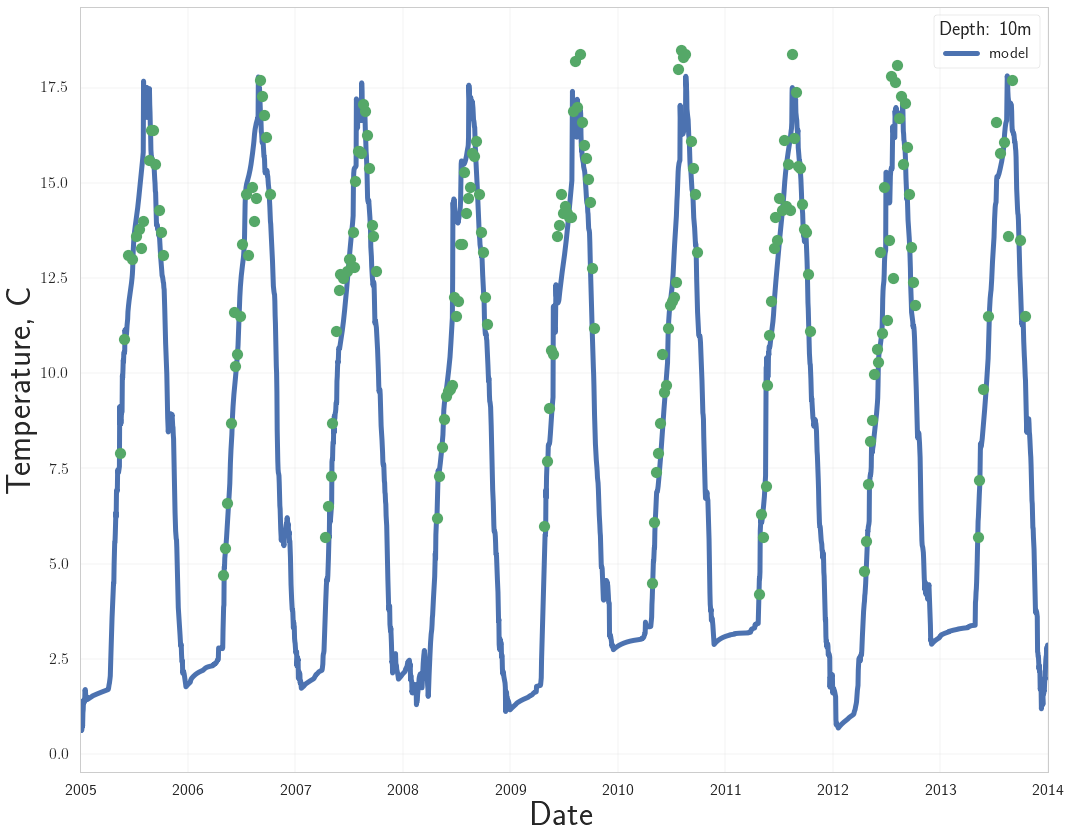

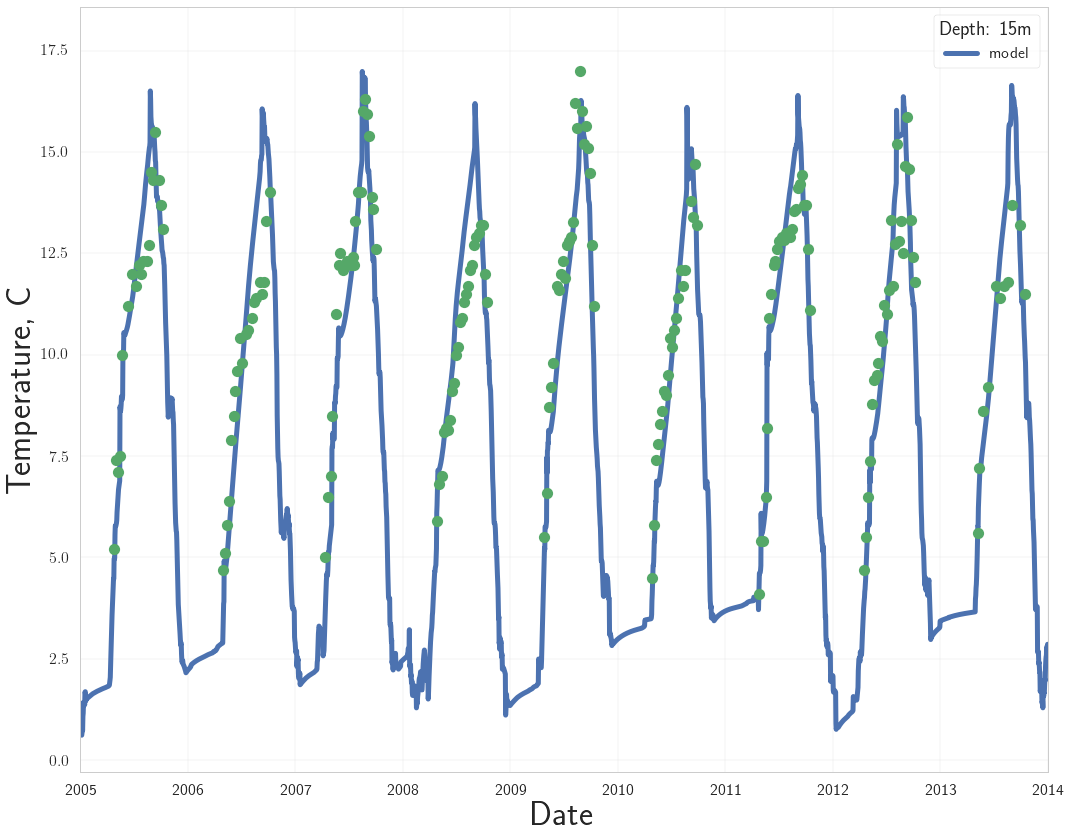

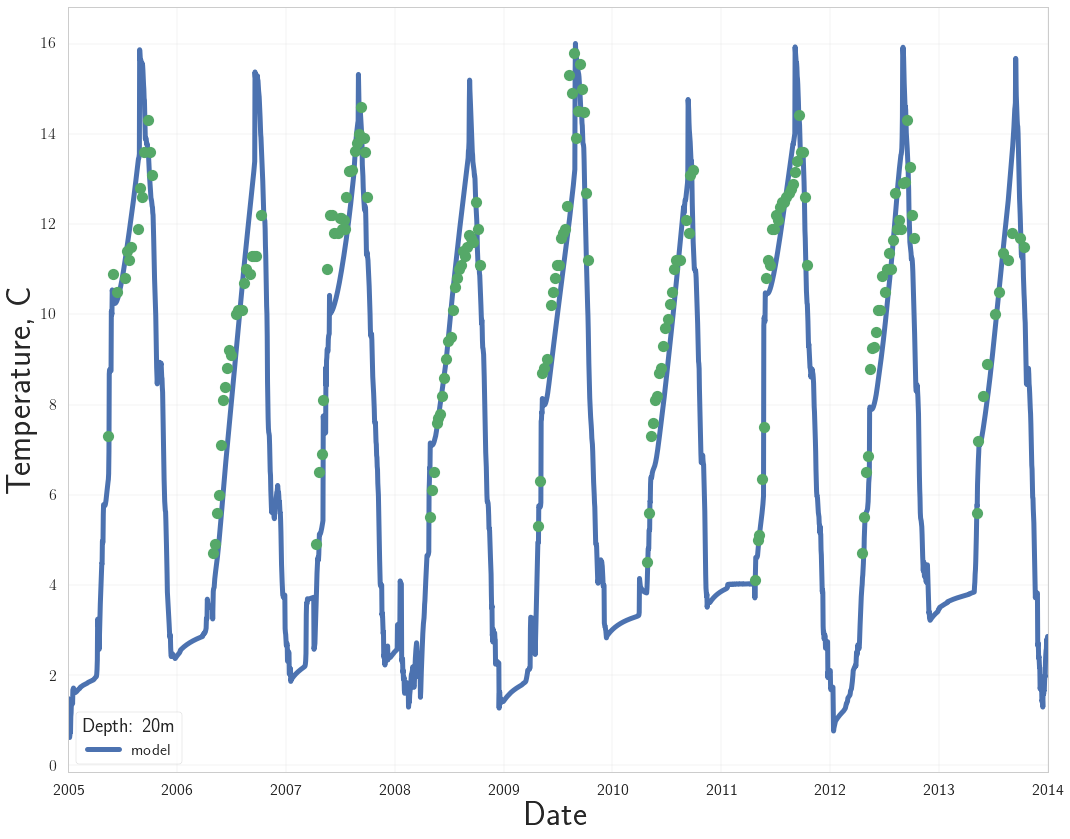

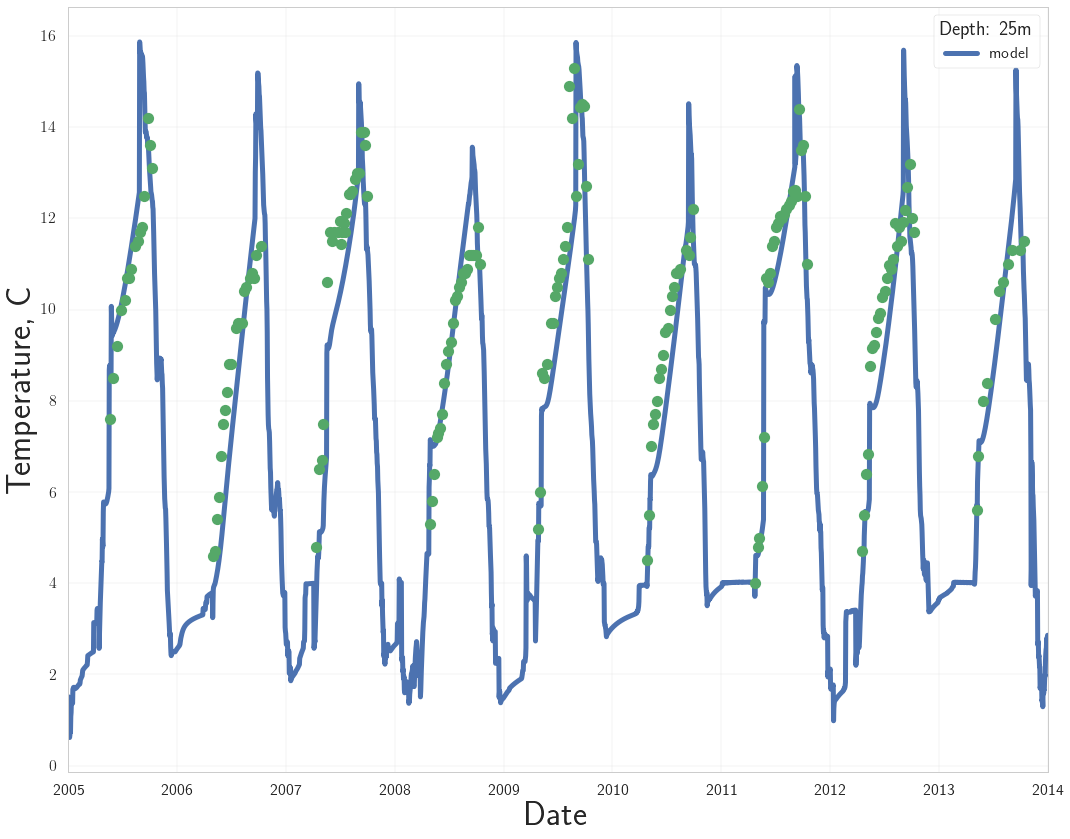

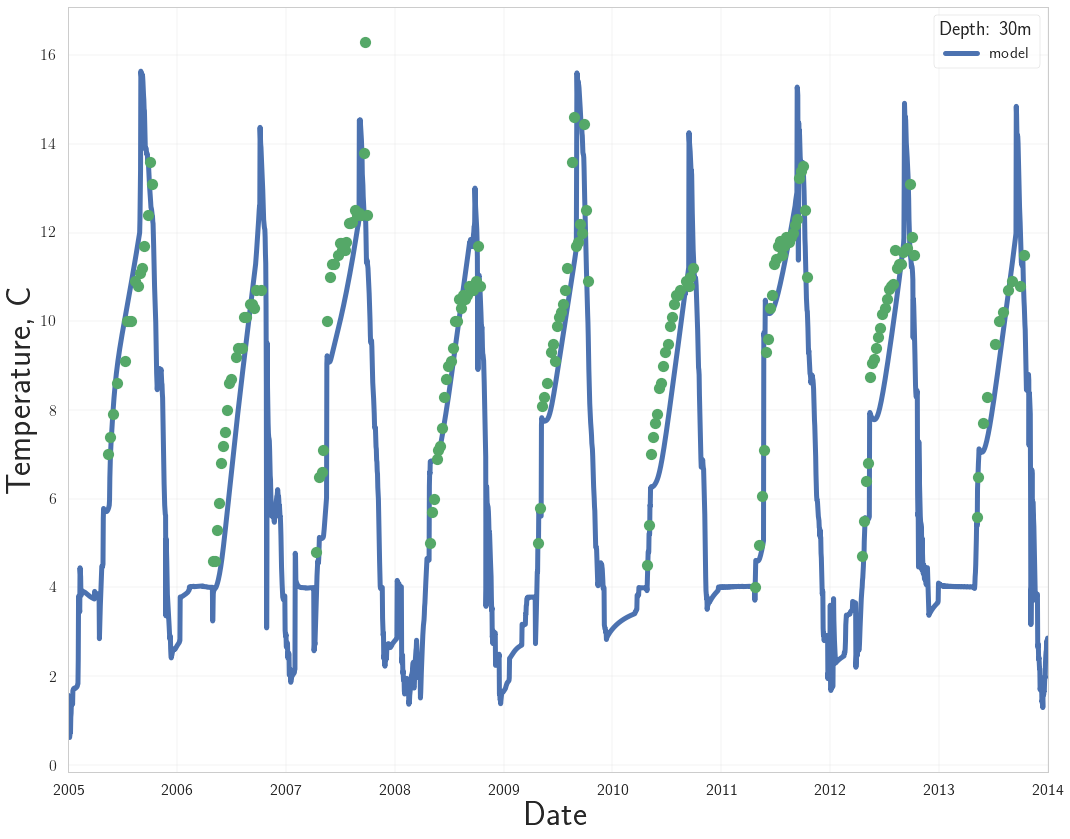

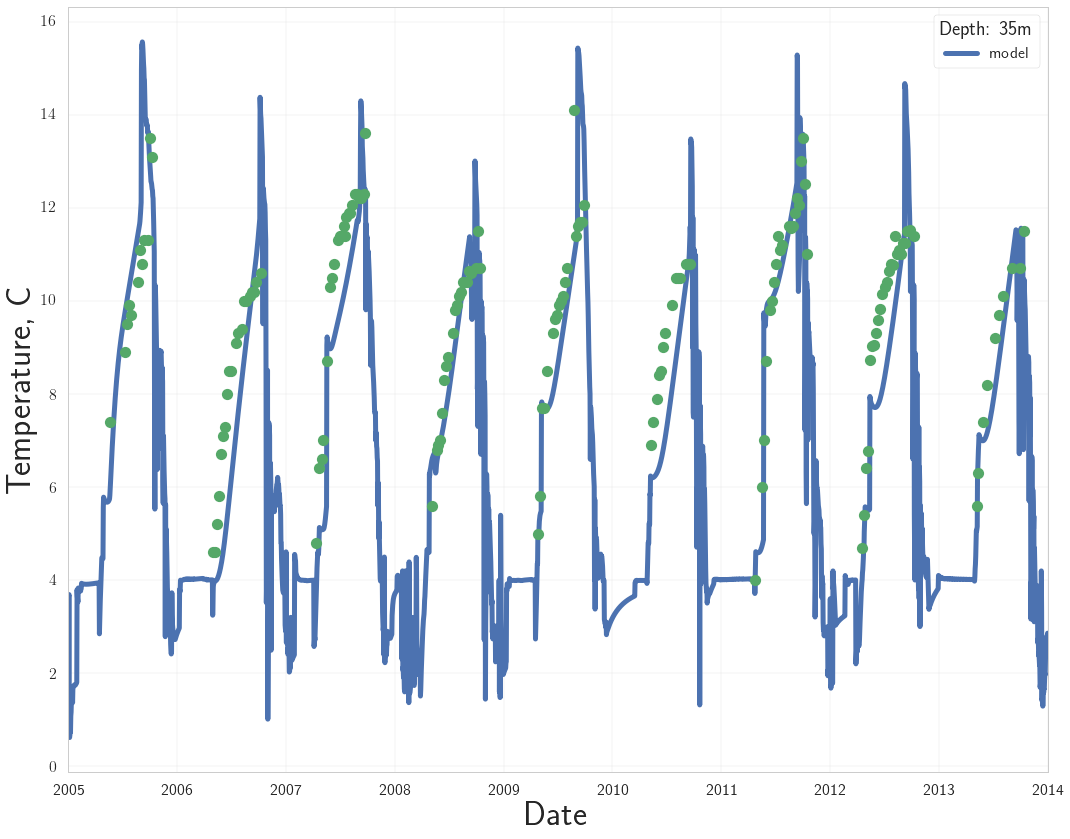

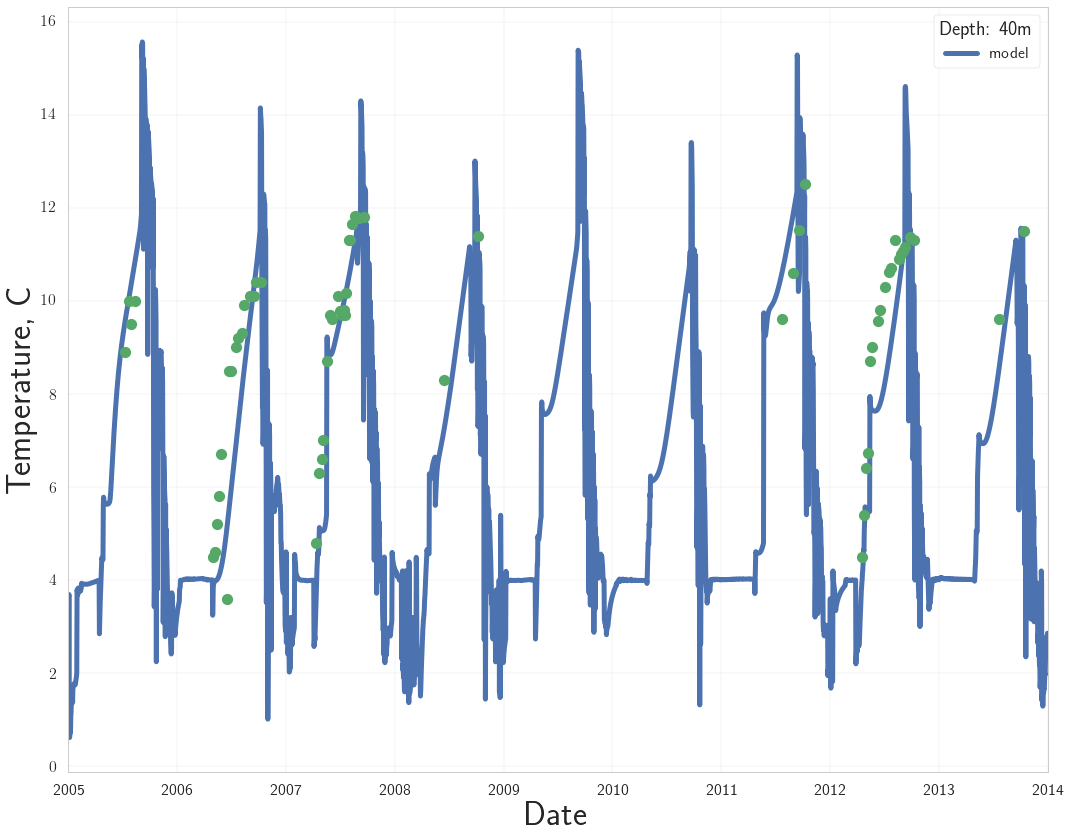

In [155]:
for d in [0,5,10,15,20,25, 30, 35, 40]:
    f, ax = plt.subplots()
    ax = plotter.plot_fit_wc(['T'], depth=d, ax=ax, dstart='2005-01-01', dend='2014-01-01')
    ax = data.plot_depth(df, 'Temperatur', depth=d, ax=ax)

In [156]:
dstart = '2006-07-1'
dend = '2006-09-1'
d = 5
value = 'Temperatur'
df[(df.Depth1==d) & (np.isfinite(df[value])) & (df['SampleDate'] > datetime.strptime(dstart, '%Y-%m-%d')) & (df['SampleDate'] < datetime.strptime(dend, '%Y-%m-%d'))][['SampleDate', value]]

,SampleDate,Temperatur
313,2006-07-03,18.9
326,2006-07-17,18.8
336,2006-07-24,19.5
348,2006-08-07,21.0
358,2006-08-14,20.6
368,2006-08-21,20.3
